In [1]:
import os

MAIN_DIR = os.getcwd()
TRAIN_DIR = os.path.join(MAIN_DIR,'simpsons/train')
VALIDATION_DIR = os.path.join(MAIN_DIR, 'simpsons/validation')


In [2]:
NUM_OF_CLASSES = 20
IMG_WIDTH, IMG_HEIGHT = 64, 64
BATCH_SIZE = 32
NUM_OF_EPOCHS = 20

In [3]:
print(f'Number of categories images: {len(os.listdir(TRAIN_DIR))}')
print(f'{os.listdir(TRAIN_DIR)}')

Number of categories images: 20
['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy', 'edna_krabappel', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lisa_simpson', 'marge_simpson', 'mayor_quimby', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'principal_skinner', 'sideshow_bob']


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, Flatten, MaxPooling2D, Activation

Using TensorFlow backend.


In [5]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.3,
        height_shift_range=0.3,
        rotation_range=45,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(directory=TRAIN_DIR, target_size=(IMG_WIDTH,IMG_HEIGHT), 
                                                    batch_size=BATCH_SIZE, class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR, target_size =(IMG_WIDTH,IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE, class_mode='categorical')

Found 19548 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [7]:
model = Sequential()

#1st
model.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same', input_shape=(IMG_WIDTH,IMG_HEIGHT, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#2
model.add(Conv2D(filters = 64, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


#3
model.add(Conv2D(128, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#4
model.add(Conv2D(128, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#5
model.add(Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

#6
model.add(Conv2D(256, kernel_size=(3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Flatten())

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(units=NUM_OF_CLASSES))
model.add(Activation('softmax'))

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
__________

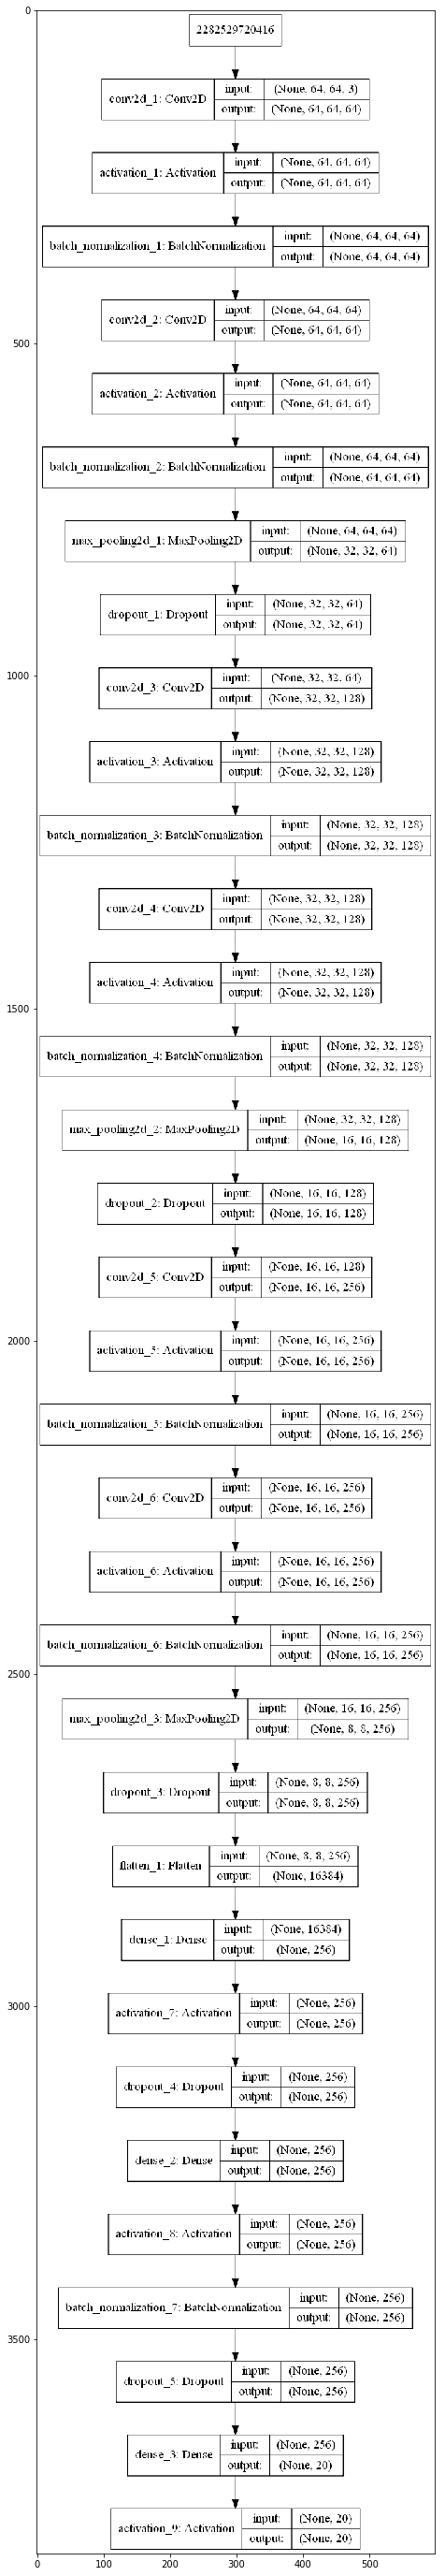

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.utils.vis_utils import plot_model
%matplotlib inline

plot_model(model, to_file='LittleVGG.png', show_layer_names=True, show_shapes=True)
img = mpimg.imread('LittleVGG.png')
plt.figure(figsize=(100,50))
plt.imshow(img)

In [9]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [10]:
model_checkpoint = ModelCheckpoint(filepath=os.path.join(MAIN_DIR,'littleVGG.h5'), monitor='val_loss', mode='min', verbose=1,
                                  save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss',patience=3,verbose=1, min_delta=0, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_delta=0.00001)

callbacks = [model_checkpoint, early_stopping, reduce_lr]

In [11]:
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
num_of_train_samples = 19548
num_of_validation_train_samples = 990

history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=num_of_train_samples//BATCH_SIZE, 
                              epochs=NUM_OF_EPOCHS,
                              validation_data=validation_generator, 
                              validation_steps=num_of_validation_train_samples//BATCH_SIZE,
                              verbose=True,
                              callbacks=callbacks)

Epoch 1/20
610/610 [==============================] - 91s 149ms/step - loss: 3.3419 - acc: 0.1124 - val_loss: 3.3799 - val_acc: 0.1417

Epoch 00001: val_loss improved from inf to 3.37988, saving model to D:\Projects\Github Projects\LittleVGG\littleVGG.h5
Epoch 2/20
610/610 [==============================] - 86s 141ms/step - loss: 2.5693 - acc: 0.2487 - val_loss: 2.2362 - val_acc: 0.3674

Epoch 00002: val_loss improved from 3.37988 to 2.23616, saving model to D:\Projects\Github Projects\LittleVGG\littleVGG.h5
Epoch 3/20
610/610 [==============================] - 85s 140ms/step - loss: 1.9639 - acc: 0.4189 - val_loss: 1.6669 - val_acc: 0.4958

Epoch 00003: val_loss improved from 2.23616 to 1.66690, saving model to D:\Projects\Github Projects\LittleVGG\littleVGG.h5
Epoch 4/20
610/610 [==============================] - 85s 139ms/step - loss: 1.4180 - acc: 0.5817 - val_loss: 1.1015 - val_acc: 0.6618

Epoch 00004: val_loss improved from 1.66690 to 1.10152, saving model to D:\Projects\Github 

In [28]:
history_dict = history.history
print(history_dict.keys())
print(history_dict)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])
{'val_loss': [3.3798810561498005, 2.236161204121058, 1.666898410603995, 1.1015211440825015, 1.1772544127665383, 0.7741635429336532, 0.5013518628347393, 0.5062300376827383, 0.6087337939500311, 0.6296154245703106], 'val_acc': [0.14166666666666666, 0.3674321503131524, 0.4958246354021459, 0.6617954078447346, 0.6461377878029809, 0.7828810015899403, 0.8528183719808224, 0.8528183718563869, 0.835073068022479, 0.8194154482295966], 'loss': [3.3418687503845965, 2.5692769960195077, 1.9639356821427265, 1.418086216473682, 1.1169585318417792, 0.9577300110467268, 0.8334443252529856, 0.7679737266714296, 0.6954728331959719, 0.6478694859013301], 'acc': [0.11244877049180328, 0.24871899979503997, 0.4188870670341473, 0.5816765730804683, 0.6702705472555042, 0.7196146751627812, 0.7584033613201047, 0.7791043246689086, 0.8019573683131789, 0.8158946505797938], 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}


In [43]:
# losses

train_loss = history_dict['loss']
valid_loss = history_dict['val_loss']

print(train_loss)
print(10*'*')
print(valid_loss)

num_of_epochs_train_loss = list(range(0,len(train_loss)))
num_of_epochs_valid_loss = list(range(0,len(valid_loss)))
print(10*'*')
print(num_of_epochs_train_loss)
print(10*'*')
print(num_of_epochs_valid_loss)

[3.3418687503845965, 2.5692769960195077, 1.9639356821427265, 1.418086216473682, 1.1169585318417792, 0.9577300110467268, 0.8334443252529856, 0.7679737266714296, 0.6954728331959719, 0.6478694859013301]
**********
[3.3798810561498005, 2.236161204121058, 1.666898410603995, 1.1015211440825015, 1.1772544127665383, 0.7741635429336532, 0.5013518628347393, 0.5062300376827383, 0.6087337939500311, 0.6296154245703106]
**********
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
**********
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [17]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

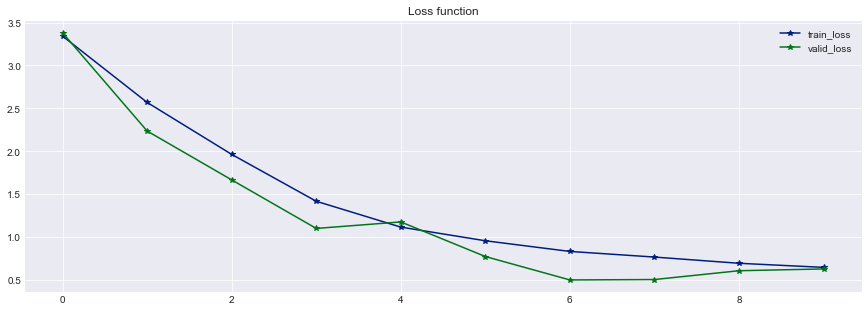

In [105]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.grid(True)

plt.title('Loss function')
plt.plot(num_of_epochs_train_loss,train_loss, marker='*' )
plt.plot(num_of_epochs_valid_loss,valid_loss, marker='*')
plt.legend(['train_loss', 'valid_loss'])
plt.show()

In [53]:
# accuracies

train_acc = history_dict['acc']
valid_acc = history_dict['val_acc']

print(train_acc)
print(10*'*')
print(valid_acc)

num_of_epochs_train_acc = list(range(0,len(train_acc)))
num_of_epochs_valid_acc = list(range(0,len(valid_acc)))
print(10*'*')
print(num_of_epochs_train_acc)
print(10*'*')
print(num_of_epochs_valid_acc)

[0.11244877049180328, 0.24871899979503997, 0.4188870670341473, 0.5816765730804683, 0.6702705472555042, 0.7196146751627812, 0.7584033613201047, 0.7791043246689086, 0.8019573683131789, 0.8158946505797938]
**********
[0.14166666666666666, 0.3674321503131524, 0.4958246354021459, 0.6617954078447346, 0.6461377878029809, 0.7828810015899403, 0.8528183719808224, 0.8528183718563869, 0.835073068022479, 0.8194154482295966]
**********
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
**********
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


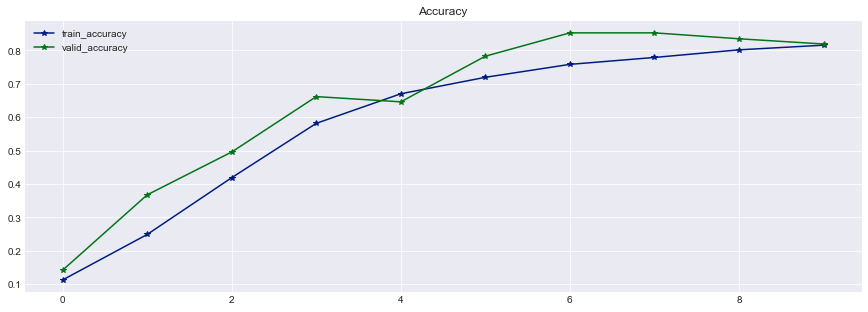

In [106]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15,5))
plt.grid(True)

plt.title('Accuracy')
plt.plot(num_of_epochs_train_acc,train_acc, marker='*' )
plt.plot(num_of_epochs_valid_acc,valid_acc, marker='*')
plt.legend(['train_accuracy', 'valid_accuracy'])
plt.show()

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR, target_size =(IMG_WIDTH,IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE, class_mode='categorical',shuffle=False)


Found 990 images belonging to 20 classes.


In [94]:
class_labels = validation_generator.class_indices
class_labels = {value:key for key,value in class_labels.items()}
classes = list(class_labels.values())
print(classes)

['abraham_grampa_simpson', 'apu_nahasapeemapetilon', 'bart_simpson', 'charles_montgomery_burns', 'chief_wiggum', 'comic_book_guy', 'edna_krabappel', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lisa_simpson', 'marge_simpson', 'mayor_quimby', 'milhouse_van_houten', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'principal_skinner', 'sideshow_bob']


In [101]:
num_of_validation_samples = 990

Y_pred = model.predict_generator(generator=validation_generator,steps= num_of_validation_samples//BATCH_SIZE+1)
print(y_pred.shape)

(990,)


In [100]:
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred.shape)

(990,)


In [102]:
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion Matrix
[[41  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1]
 [ 0  0 41  0  0  0  1  0  1  0  0  4  0  0  0  0  0  3  0  0]
 [ 0  0  0 38  0  0  0  2  1  0  0  2  0  2  0  1  0  0  0  2]
 [ 0  0  0  0 47  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0]
 [ 1  0  0  2  3 28  1  1  1  0  0  0  0  1  1  1  2  5  0  2]
 [ 0  0  0  0  0  0 39  1  0  0  0  2  2  0  0  0  4  1  0  1]
 [ 3  0  0  0  0  0  0 43  0  0  0  2  0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 48  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 50  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  1  1  0 40  0  0  0  0  0  4  0  0  2]
 [ 0  0  6  1  0  0  0  0  2  0  0 40  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  1 46  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  1  0  0  3  0  0  0  1 43  0  1  1  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  1 